In [57]:
import sys, os
import numpy as np
from scipy.fft import fftn, ifftn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, CenteredNorm
%matplotlib inline

sys.path.append('../src/')
from tensor import Particles

In [78]:
Lbox = 75
n = 256
Rs = 0.5
workers = 8

grid = Particles(n, Lbox)
# grid.range = [[0, Lbox], [0, Lbox], [0, Lbox]]
grid.rho = np.fromfile('../../tully-fisher/data/TNG100-1/rho_all_256.bin', dtype=np.float64).reshape(n, n, n)
grid.rho = grid.rho / np.mean(grid.rho) - 1
%time grid.TensorField(Rs=Rs, workers=workers)

CPU times: user 6.4 s, sys: 5.3 s, total: 11.7 s
Wall time: 2.55 s


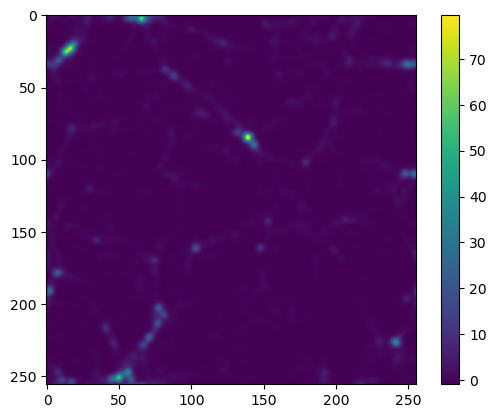

In [79]:
plt.imshow(grid.rho_smooth[:,100,:])
plt.colorbar()

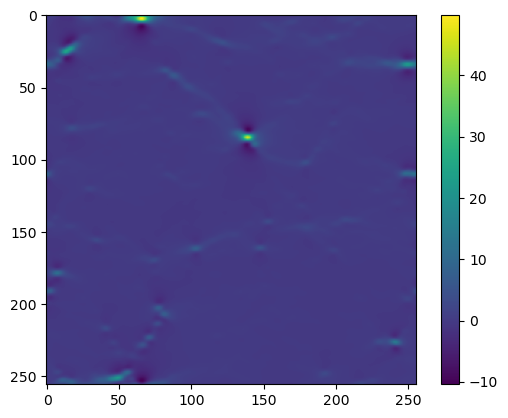

In [80]:
plt.imshow(grid.tensor[0,:,100,:])
plt.colorbar()

In [81]:
%time grid.PotentialField(Rs, workers=workers)

CPU times: user 840 ms, sys: 814 ms, total: 1.65 s
Wall time: 217 ms


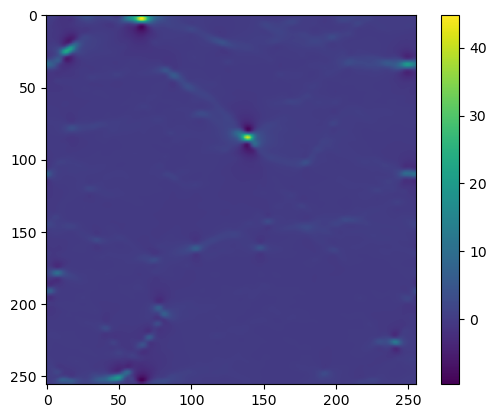

In [82]:
plt.imshow(np.gradient(np.gradient(grid.phi, grid.h, axis=0), grid.h, axis=0)[:,100,:])
plt.colorbar()